In [1]:
import numpy as np
import pandas as pd
import webbrowser as wb
from bs4 import BeautifulSoup
import requests
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import Series, DataFrame
from numpy.random import randn

linkBase = 'https://en.wikipedia.org/wiki/{0}'

%matplotlib inline

In [150]:
def getClimate(cityName):
    linkBase = 'https://en.wikipedia.org/wiki/{0}'
    link = linkBase.format(cityName)
    """extract tables of a page"""
    # Request content from web page
    result = requests.get(link)
    c = result.content

    # Set as Beautiful Soup Object
    soup = BeautifulSoup(c)
    #print(soup)
    rawTables = soup.findAll("table",{'class':'wikitable collapsible'})
    #print(len(rawTables))
    rows = rawTables[0].findAll('tr')
    table = []
    counter = 0
    for row in rows:
        #print(counter)
        #print(row)
        cells = row.findAll(['td', 'th'])
        
        cellData = []
        if len(cells) > 10 :
            for cell in cells:
                str = cell.text.replace('\n','')
                str = str.replace(',', '')
                #str = ''.join(e for e in str if e.isalnum())
                str = str.replace(u'\u2212','-')
                str = re.sub('\(.*\)','',str)
                str = re.sub('\−', '\-', str)
                str = re.sub('[^A-Za-z0-9.\- ]+','',str)
                str = str.strip()
                cellData.append(str)
            table.append(cellData)
            counter = counter + 1
            #print(len(cells))
    df = DataFrame(table[1:][:], columns=table[0][:])
    df.index = df['Month']
    df.drop('Month',axis = 1, inplace = True)
    #print(df)
    for i in df.index:
        for c in df.columns:
            try:
                df.ix[i][c] = float(df.ix[i][c])
            except:
                df.ix[i][c] = 0
    return df

In [168]:
def compare_cities(city1, city2, is_far='F'):
    climate1 = getClimate(city1).drop('Year', 1)
    climate2 = getClimate(city2).drop('Year', 1)
    
    #print(climate1)
    plt.plot(climate1.ix['Daily mean C'], color='blue')
    plt.fill_between(range(len(climate1.columns))
                 ,climate1.ix['Average low C'].values.astype(np.float16)
                 ,climate1.ix['Average high C'].values.astype(np.float16), alpha = 0.2, color='blue')
    
    if is_far == 'T':
        #print(climate2)
        plt.plot((climate2.ix['Daily mean F'] - 32) / 1.8 , color='red')
        plt.fill_between(range(len(climate2.columns))
                     ,(climate2.ix['Average low F'].values.astype(np.float16) - 32) / 1.8
                     ,(climate2.ix['Average high F'].values.astype(np.float16) - 32 ) / 1.8, alpha = 0.2, color='red')
    else:
        #print(climate2)
        plt.plot(climate2.ix['Daily mean C'] , color='red')
        plt.fill_between(range(len(climate2.columns))
                     ,climate2.ix['Average low C'].values.astype(np.float16)
                     ,climate2.ix['Average high C'].values.astype(np.float16), alpha = 0.2, color='red')


In [169]:
def compare_records_cities(city1, city2, is_far='F'):
    climate1 = getClimate(city1).drop('Year', 1)
    climate2 = getClimate(city2).drop('Year', 1)
    
    #print(climate1)
    #plt.plot(climate1.ix['Daily mean C'], color='blue')
    plt.fill_between(range(len(climate1.columns))
                 ,climate1.ix['Record low C'].values.astype(np.float16)
                 ,climate1.ix['Record high C'].values.astype(np.float16), alpha = 0.2, color='blue')
    
    if is_far == 'T':
        #print(climate2)
        #plt.plot((climate2.ix['Daily mean F'] - 32) / 1.8 , color='red')
        plt.fill_between(range(len(climate2.columns))
                     ,(climate2.ix['Record low F'].values.astype(np.float16) - 32) / 1.8
                     ,(climate2.ix['Record high F'].values.astype(np.float16) - 32 ) / 1.8, alpha = 0.2, color='red')
    else:
        #print(climate2)
        #plt.plot(climate2.ix['Daily mean C'] , color='red')
        plt.fill_between(range(len(climate2.columns))
                     ,climate2.ix['Record low C'].values.astype(np.float16)
                     ,climate2.ix['Record high C'].values.astype(np.float16), alpha = 0.2, color='red')


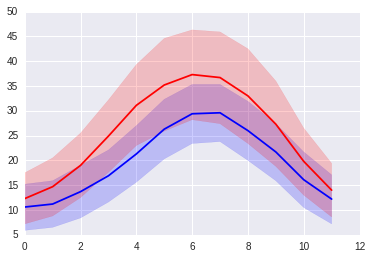

In [173]:
compare_cities('antalya', 'ahwaz', 'F')

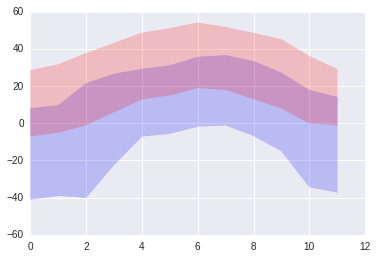

In [171]:
compare_records_cities('erzurum', 'ahwaz','F')